In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')
df.iloc[:,0:10].head(5)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0


In [3]:
df.iloc[:,10:].head(5)

,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
exclude_columns = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

# Convert all other columns to categorical, except the ones in 'exclude_columns'
for column in df.columns:
    if column not in exclude_columns:
        df[column] = df[column].astype('category')

        # From visualization, we realize the following are also categorical. Thus we convert them as well.
convert_columns = ['GenHlth', 'Age', 'Education', 'Income']

for column in df.columns:
    if column in convert_columns:
        df[column] = df[column].astype('category')

df.dtypes

Diabetes_012            category
HighBP                  category
HighChol                category
CholCheck               category
BMI                      float64
Smoker                  category
Stroke                  category
HeartDiseaseorAttack    category
PhysActivity            category
Fruits                  category
Veggies                 category
HvyAlcoholConsump       category
AnyHealthcare           category
NoDocbcCost             category
GenHlth                 category
MentHlth                 float64
PhysHlth                 float64
DiffWalk                category
Sex                     category
Age                     category
Education               category
Income                  category
dtype: object

In [4]:
df['Diabetes_012'].value_counts()

0.0    213703
2.0     35346
1.0      4631
Name: Diabetes_012, dtype: int64

In [5]:
import pandas as pd

# Drop observations with prediabetes (diabetes_status == 1)
df = df[df['Diabetes_012'] != 1]

# Recode diabetes_status: 0 remains 0, 2 (diabetes) becomes 1
df['Diabetes_012'] = df['Diabetes_012'].map({0: 0, 2: 1})

df['Diabetes_012'].value_counts()

0.0    213703
1.0     35346
Name: Diabetes_012, dtype: int64

In [6]:
df_majority = df[df['Diabetes_012'] == 0]
df_minority = df[df['Diabetes_012'] != 0]

# Downsample the majority class
df_majority_downsampled = df_majority.sample(n=len(df_minority), random_state=42)
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Shuffle the DataFrame rows
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

df_balanced['Diabetes_012'].value_counts()

1.0    35346
0.0    35346
Name: Diabetes_012, dtype: int64

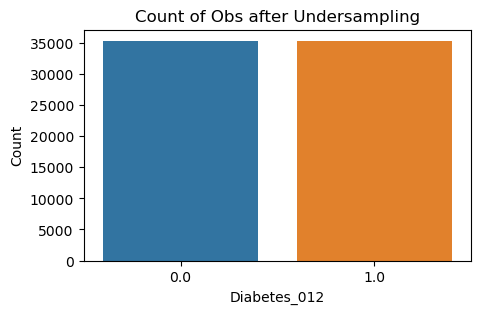

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))
sns.countplot(x='Diabetes_012', data=df_balanced)
plt.title('Count of Obs after Undersampling')
plt.xlabel('Diabetes_012')
plt.ylabel('Count')
plt.show()

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 'Diabetes_012' is the target variable
X = df_balanced.drop('Diabetes_012', axis=1)
y = df_balanced['Diabetes_012']

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

categorical_vars = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 
                    'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 
                    'NoDocbcCost', 'GenHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

In [51]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score  # Import recall_score

# Assuming X_train, X_val, y_train, y_val are defined earlier in your code

# Setup the hyperparameter grid for tuning
param_grid = {
    'max_depth': [10, 30, 50],
    'bootstrap': [True, False]
}

best_model = None
best_recall = 0  # Use best_recall instead of best_accuracy
best_params = {}

# Iterate over each combination of hyperparameters
for max_depth in param_grid['max_depth']:
    for bootstrap in param_grid['bootstrap']:
        params = {'max_depth': max_depth, 'bootstrap': bootstrap, 'n_estimators': 100}
        rf = RandomForestClassifier(random_state=42, **params)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        recall = recall_score(y_val, y_pred, average='macro')  # Compute recall instead of accuracy
        print(f"Params: {params}, Validation Recall: {recall}")

        if recall > best_recall:  # Compare recall instead of accuracy
            best_recall = recall
            best_model = rf
            best_params = params

# Evaluate the best model on the test set
y_test_pred = best_model.predict(X_test)
test_recall = recall_score(y_test, y_test_pred, average='macro')  # Compute test recall
print(f"Best Parameters: {best_params}, Test Recall: {test_recall}")


Params: {'max_depth': 10, 'bootstrap': True, 'n_estimators': 100}, Validation Recall: 0.7549224355109656
Params: {'max_depth': 10, 'bootstrap': False, 'n_estimators': 100}, Validation Recall: 0.7536638702753342
Params: {'max_depth': 30, 'bootstrap': True, 'n_estimators': 100}, Validation Recall: 0.7449159682593303
Params: {'max_depth': 30, 'bootstrap': False, 'n_estimators': 100}, Validation Recall: 0.7387432884976848
Params: {'max_depth': 50, 'bootstrap': True, 'n_estimators': 100}, Validation Recall: 0.7481946664958238
Params: {'max_depth': 50, 'bootstrap': False, 'n_estimators': 100}, Validation Recall: 0.7381872085316085
Best Parameters: {'max_depth': 10, 'bootstrap': True, 'n_estimators': 100}, Test Recall: 0.7515518610947554


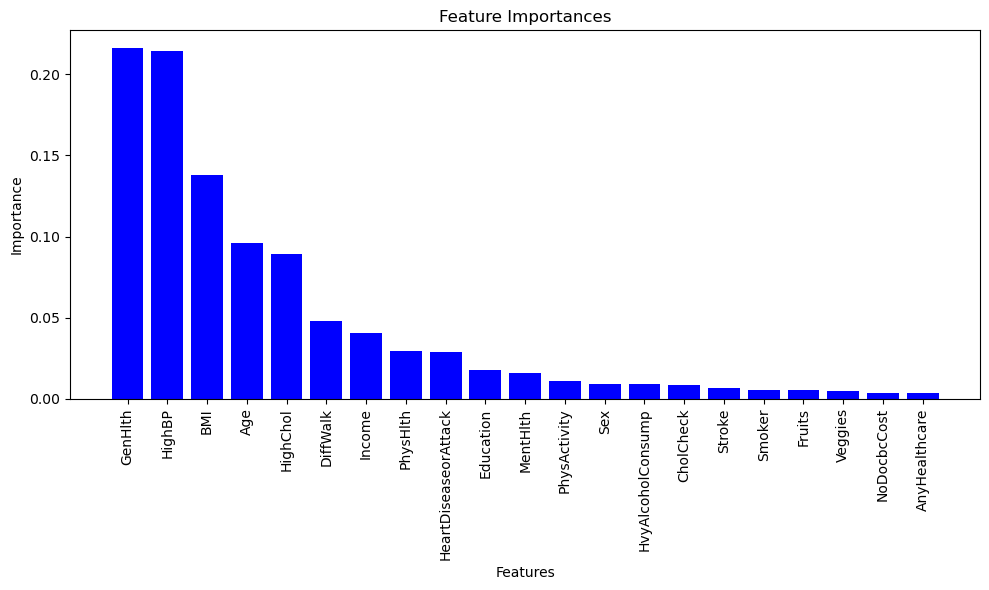

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'best_model' is your RandomForestClassifier with the best parameters found
feature_names = df_balanced.drop(columns=['Diabetes_012']).columns

# Get feature importances
importances = best_model.feature_importances_

# Sort the features by importance
indices = np.argsort(importances)[::-1]

# Prepare labels from your dataset's feature names
# Adjust 'feature_names' to match your dataset if necessary
feature_names = [feature_names[i] for i in indices]

# Plotting
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(len(importances)), importances[indices], color='b', align='center')
plt.xticks(range(len(importances)), feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

[[5001 2020]
 [1489 5629]]


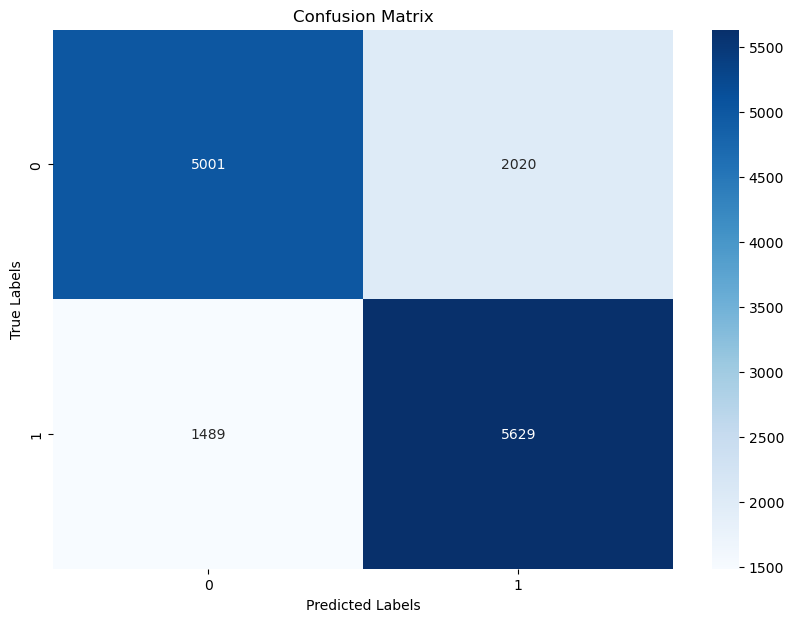

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'y_test' is your true labels for the test set
# and 'best_model' is your trained model
y_pred = best_model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print(cm)

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [9]:
cols_to_save = ['Diabetes_012','GenHlth', 'HighBP', 'BMI', 'Age', 'HighChol',
                'DiffWalk', 'Income', 'PhysHlth', 'HeartDiseaseorAttack']

In [10]:
df_processed = df_balanced.filter(cols_to_save)

df_processed

,Diabetes_012,GenHlth,HighBP,BMI,Age,HighChol,DiffWalk,Income,PhysHlth,HeartDiseaseorAttack
0,1.0,4.0,0.0,23.0,10.0,1.0,0.0,5.0,0.0,0.0
1,0.0,3.0,1.0,28.0,9.0,1.0,0.0,6.0,0.0,0.0
2,0.0,5.0,0.0,25.0,6.0,0.0,1.0,6.0,30.0,0.0
3,0.0,4.0,0.0,28.0,8.0,1.0,0.0,5.0,0.0,0.0
4,1.0,4.0,1.0,47.0,6.0,0.0,1.0,3.0,10.0,0.0
...,...,...,...,...,...,...,...,...,...,...
70687,1.0,3.0,1.0,28.0,11.0,0.0,0.0,5.0,0.0,0.0
70688,0.0,1.0,0.0,22.0,9.0,1.0,0.0,3.0,0.0,0.0
70689,1.0,2.0,1.0,23.0,11.0,1.0,0.0,4.0,2.0,0.0
70690,0.0,3.0,1.0,32.0,9.0,1.0,0.0,8.0,0.0,1.0


In [11]:
df_processed.dtypes

Diabetes_012             float64
GenHlth                 category
HighBP                  category
BMI                      float64
Age                     category
HighChol                category
DiffWalk                category
Income                  category
PhysHlth                 float64
HeartDiseaseorAttack    category
dtype: object

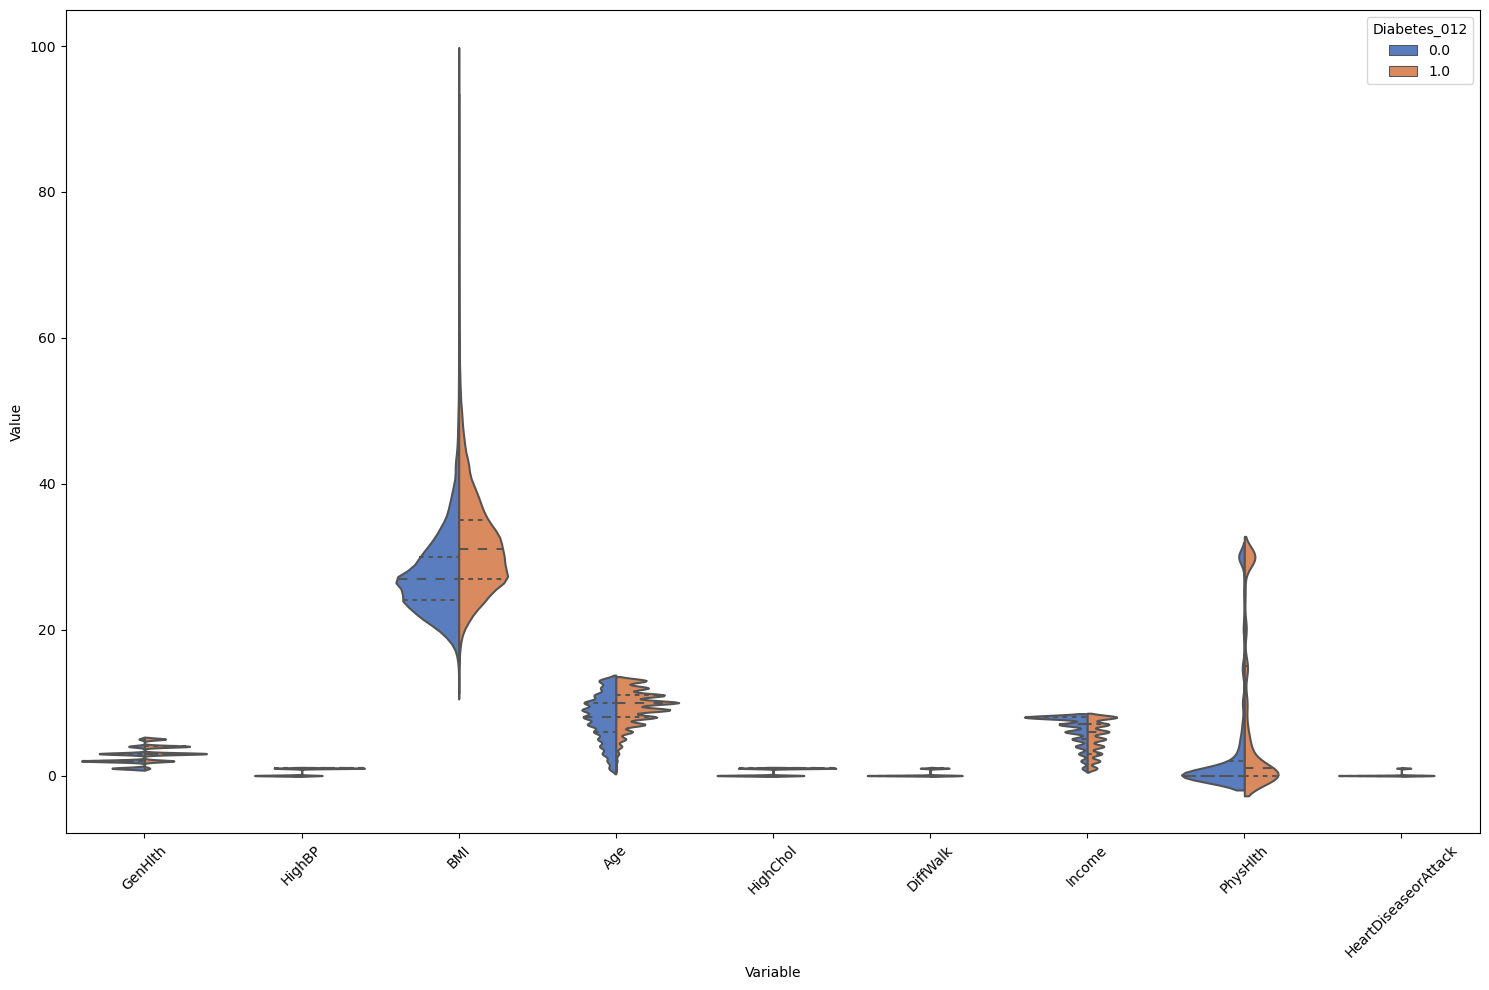

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data creation (replace this with your actual DataFrame)
# Assuming df is your DataFrame

# List of variables you want to plot, excluding the target variable
variables = ['GenHlth', 'HighBP', 'BMI', 'Age', 'HighChol', 'DiffWalk', 'Income', 'PhysHlth', 'HeartDiseaseorAttack']

# Reshape the DataFrame
df_long = pd.melt(df_processed, id_vars=['Diabetes_012'], value_vars=variables, var_name='Variable', value_name='Value')

# Plot
plt.figure(figsize=(15, 10)) # Adjust size as needed
sns.violinplot(x='Variable', y='Value', hue='Diabetes_012', data=df_long, split=True, inner='quart', palette='muted')
plt.xticks(rotation=45) # Rotate the x-axis labels for better readability
plt.tight_layout()
plt.show()


In [13]:
# Calculate Q1, Q3, and IQR for BMI
Q1_bmi = df_processed['BMI'].quantile(0.25)
Q3_bmi = df_processed['BMI'].quantile(0.75)
IQR_bmi = Q3_bmi - Q1_bmi

# Calculate Q1, Q3, and IQR for PhysHlth
Q1_phys = df_processed['PhysHlth'].quantile(0.25)
Q3_phys = df_processed['PhysHlth'].quantile(0.75)
IQR_phys = Q3_phys - Q1_phys

# Define outliers for BMI and PhysHlth
outliers_bmi = (df_processed['BMI'] < (Q1_bmi - 1.5 * IQR_bmi)) | (df_processed['BMI'] > (Q3_bmi + 1.5 * IQR_bmi))
outliers_phys = (df_processed['PhysHlth'] < (Q1_phys - 1.5 * IQR_phys)) | (df_processed['PhysHlth'] > (Q3_phys + 1.5 * IQR_phys))

# Remove outliers from the DataFrame
df_no_outliers = df_processed[~(outliers_bmi | outliers_phys)]

print(f"Original DataFrame shape: {df_processed.shape}")
print(f"DataFrame without outliers shape: {df_no_outliers.shape}")

Original DataFrame shape: (70692, 10)
DataFrame without outliers shape: (56153, 10)


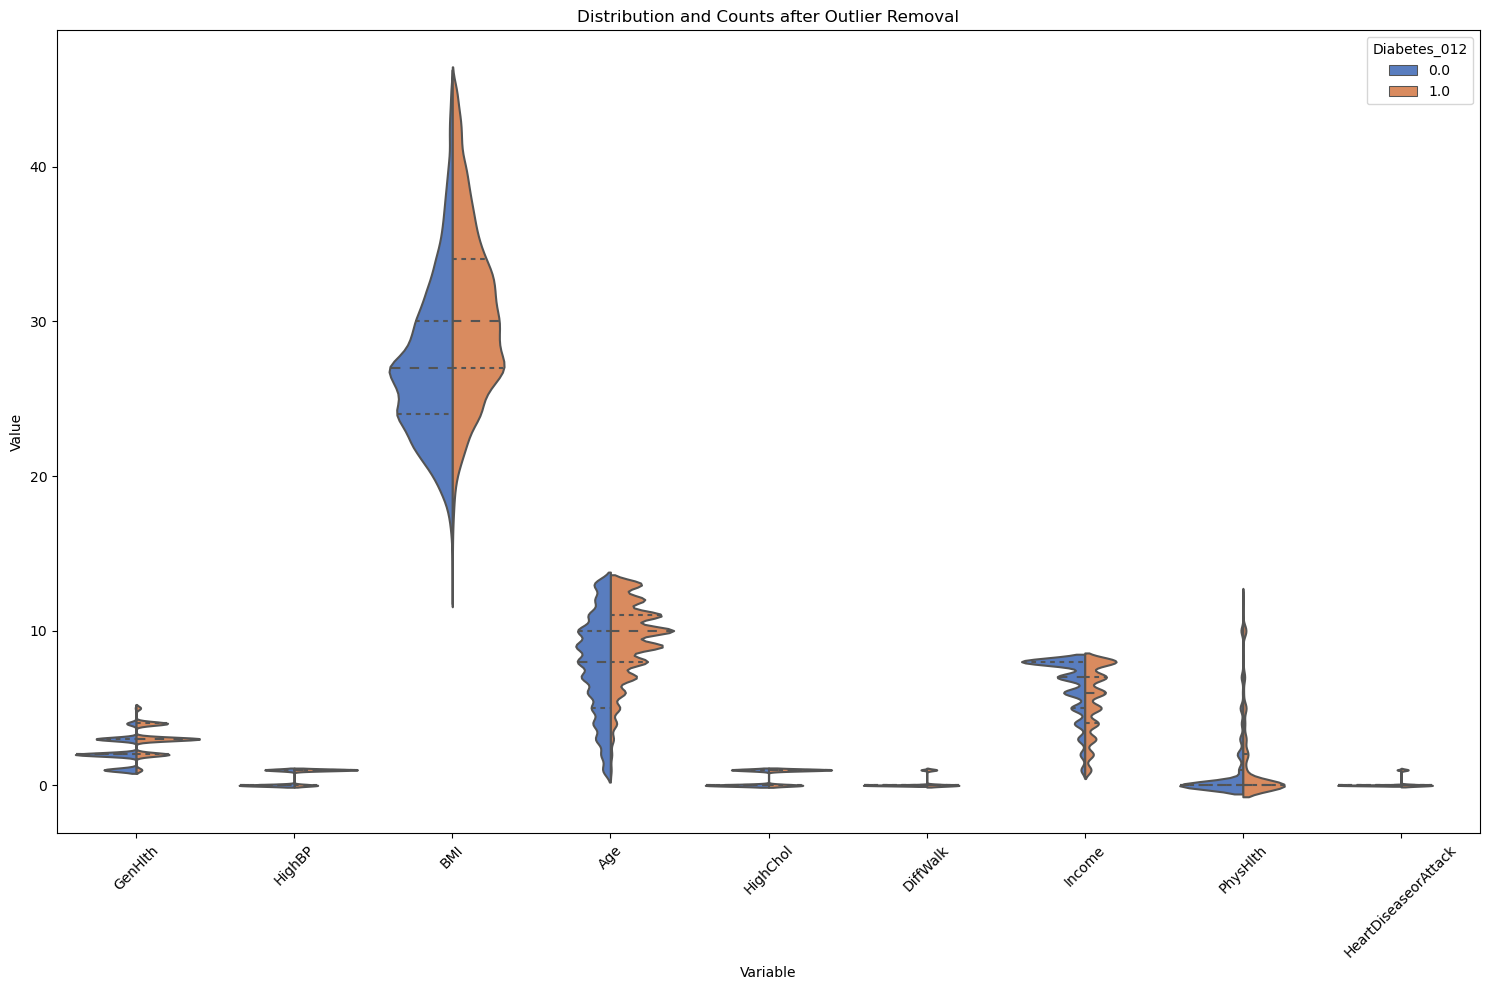

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data creation (replace this with your actual DataFrame)
# Assuming df is your DataFrame

# List of variables you want to plot, excluding the target variable
variables = ['GenHlth', 'HighBP', 'BMI', 'Age', 'HighChol', 'DiffWalk', 'Income', 'PhysHlth', 'HeartDiseaseorAttack']

# Reshape the DataFrame
df_long = pd.melt(df_no_outliers, id_vars=['Diabetes_012'], value_vars=variables, var_name='Variable', value_name='Value')

# Plot
plt.figure(figsize=(15, 10)) # Adjust size as needed
sns.violinplot(x='Variable', y='Value', hue='Diabetes_012', data=df_long, split=True, inner='quart', palette='muted')
plt.title('Distribution and Counts after Outlier Removal')
plt.xticks(rotation=45) # Rotate the x-axis labels for better readability
plt.tight_layout()
plt.show()

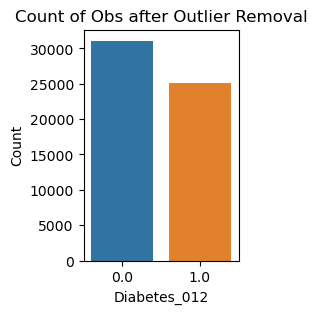

In [17]:
plt.figure(figsize=(2, 3))
sns.countplot(x='Diabetes_012', data=df_no_outliers)
plt.title('Count of Obs after Outlier Removal')
plt.xlabel('Diabetes_012')
plt.ylabel('Count')
plt.show()

df_no_outliers.to_excel("data_clean.xlsx", index=False)

pip install gower

In [23]:
pip install --upgrade pandas gower

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 18.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 14.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 14.8 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.4
    Uninstalling pandas-1.4.4:
      Successfully uninstalled pandas-1.4.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.24.4 which is incompatible.
Note: you ma

In [21]:
df_processed

,Diabetes_012,GenHlth,HighBP,BMI,Age,HighChol,DiffWalk,Income,PhysHlth,HeartDiseaseorAttack
0,1.0,4.0,0.0,23.0,10.0,1.0,0.0,5.0,0.0,0.0
1,0.0,3.0,1.0,28.0,9.0,1.0,0.0,6.0,0.0,0.0
2,0.0,5.0,0.0,25.0,6.0,0.0,1.0,6.0,30.0,0.0
3,0.0,4.0,0.0,28.0,8.0,1.0,0.0,5.0,0.0,0.0
4,1.0,4.0,1.0,47.0,6.0,0.0,1.0,3.0,10.0,0.0
...,...,...,...,...,...,...,...,...,...,...
70687,1.0,3.0,1.0,28.0,11.0,0.0,0.0,5.0,0.0,0.0
70688,0.0,1.0,0.0,22.0,9.0,1.0,0.0,3.0,0.0,0.0
70689,1.0,2.0,1.0,23.0,11.0,1.0,0.0,4.0,2.0,0.0
70690,0.0,3.0,1.0,32.0,9.0,1.0,0.0,8.0,0.0,1.0


In [22]:
df_processed.dtypes

Diabetes_012             float64
GenHlth                 category
HighBP                  category
BMI                      float64
Age                     category
HighChol                category
DiffWalk                category
Income                  category
PhysHlth                 float64
HeartDiseaseorAttack    category
dtype: object

In [28]:
#variables = ['GenHlth', 'HighBP', 'BMI', 'Age', 'HighChol', 'DiffWalk', 'Income', 'PhysHlth', 'HeartDiseaseorAttack']
for col in ['Diabetes_012','GenHlth', 'HighBP', 'Age', 'HighChol', 'DiffWalk', 'Income', 'HeartDiseaseorAttack']:  # List your specific columns here
    df_processed[col] = df_processed[col].astype(int)
df_processed

,Diabetes_012,GenHlth,HighBP,BMI,Age,HighChol,DiffWalk,Income,PhysHlth,HeartDiseaseorAttack
0,1,4,0,23.0,10,1,0,5,0.0,0
1,0,3,1,28.0,9,1,0,6,0.0,0
2,0,5,0,25.0,6,0,1,6,30.0,0
3,0,4,0,28.0,8,1,0,5,0.0,0
4,1,4,1,47.0,6,0,1,3,10.0,0
...,...,...,...,...,...,...,...,...,...,...
70687,1,3,1,28.0,11,0,0,5,0.0,0
70688,0,1,0,22.0,9,1,0,3,0.0,0
70689,1,2,1,23.0,11,1,0,4,2.0,0
70690,0,3,1,32.0,9,1,0,8,0.0,1


In [29]:
for col in ['Diabetes_012','GenHlth', 'HighBP', 'Age', 'HighChol', 'DiffWalk', 'Income', 'HeartDiseaseorAttack']:
    df_processed[col] = df_processed[col].astype('category')
df_processed

,Diabetes_012,GenHlth,HighBP,BMI,Age,HighChol,DiffWalk,Income,PhysHlth,HeartDiseaseorAttack
0,1,4,0,23.0,10,1,0,5,0.0,0
1,0,3,1,28.0,9,1,0,6,0.0,0
2,0,5,0,25.0,6,0,1,6,30.0,0
3,0,4,0,28.0,8,1,0,5,0.0,0
4,1,4,1,47.0,6,0,1,3,10.0,0
...,...,...,...,...,...,...,...,...,...,...
70687,1,3,1,28.0,11,0,0,5,0.0,0
70688,0,1,0,22.0,9,1,0,3,0.0,0
70689,1,2,1,23.0,11,1,0,4,2.0,0
70690,0,3,1,32.0,9,1,0,8,0.0,1


In [30]:
df_processed.dtypes

Diabetes_012            category
GenHlth                 category
HighBP                  category
BMI                      float64
Age                     category
HighChol                category
DiffWalk                category
Income                  category
PhysHlth                 float64
HeartDiseaseorAttack    category
dtype: object

In [32]:
for col in ['Diabetes_012', 'HighBP', 'HighChol', 'DiffWalk', 'HeartDiseaseorAttack']:
    df_processed[col] = df_processed[col].astype(bool)
df_processed.dtypes

Diabetes_012                bool
GenHlth                 category
HighBP                      bool
BMI                      float64
Age                     category
HighChol                    bool
DiffWalk                    bool
Income                  category
PhysHlth                 float64
HeartDiseaseorAttack        bool
dtype: object

In [39]:
df_processed.dtypes

Diabetes_012                bool
GenHlth                     int8
HighBP                      bool
BMI                      float64
Age                     category
HighChol                    bool
DiffWalk                    bool
Income                  category
PhysHlth                 float64
HeartDiseaseorAttack        bool
dtype: object

In [41]:
# Convert a categorical column to its integer codes
for col in ['GenHlth','Age', 'Income',]:
    df_processed[col] = df_processed[col].astype(str)
df_processed.dtypes

Diabetes_012               bool
GenHlth                  object
HighBP                     bool
BMI                     float64
Age                      object
HighChol                   bool
DiffWalk                   bool
Income                   object
PhysHlth                float64
HeartDiseaseorAttack       bool
dtype: object

In [ ]:
# alternative: gower distance
import gower

# Calculate Gower distance matrix
distance_matrix = gower.gower_matrix(df_processed)

# Calculate mean distance to other points for each point
mean_distances = np.mean(distance_matrix, axis=1)

# Determine a threshold for outliers; this example uses the mean plus one standard deviation
threshold = np.mean(mean_distances) + np.std(mean_distances)

# Identify outliers
outliers = np.where(mean_distances > threshold)[0]

print("Outlier indices:", outliers)

In [34]:
data = {
    'age': [25, 30, 45, 35, 50, 23, 39, 47, 29, 37],
    'income': [50000, 54000, 32000, 59000, 37000, 68000, 39000, 43000, 56000, 60000],
    'gender': ['male', 'female', 'female', 'male', 'male', 'female', 'female', 'male', 'male', 'female'],
    'occupation': ['tech', 'health', 'health', 'tech', 'tech', 'health', 'health', 'tech', 'tech', 'health']
}

df = pd.DataFrame(data)

# Calculate Gower distance matrix
distance_matrix = gower.gower_matrix(df)

# Calculate mean distance to other points for each point
mean_distances = np.mean(distance_matrix, axis=1)

# Determine a threshold for outliers; this example uses the mean plus one standard deviation
threshold = np.mean(mean_distances) + np.std(mean_distances)

# Identify outliers
outliers = np.where(mean_distances > threshold)[0]

print("Outlier indices:", outliers)

Outlier indices: [2 4 5]
